In [1]:
import pandas as pd
df = pd.read_excel('https://raw.githubusercontent.com/Amber-tech23/Patterns-of-Political-Leadership-Succession-and-National-Development/main/archigos%208.0_1.xlsx')

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,...,avg_population_growth_rate,avg_natural_resource_rents,polity_mean,was_colonized,colonial_power,colonial_begin,colonial_end,colonial_duration,tenure_days,tenure_years
0,0,0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,04mar1869,1877-03-04,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,2922.0,8.000000
1,1,1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,04mar1877,1881-03-04,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,1461.0,4.000000
2,2,2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,04mar1881,1881-09-19,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,199.0,0.544832
3,3,3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,19sep1881,1885-03-04,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,1262.0,3.455168
4,4,4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,04mar1885,1889-03-04,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,1461.0,4.000000


In [5]:
import numpy as np
df['colonial_duration'] = df['colonial_duration'].astype(str).str[:2]
df['colonial_duration'].unique()
df['colonial_duration'] = pd.to_numeric(df['colonial_duration'], errors='coerce')
df['colonial_duration'].unique()

array([nan, 39., 43., 10., 82., 92., 54., 72., 75., 58., 99., 37., 16.,
       50., 20., 52., 19., 91., 73., 71., 13., 14., 15., 40., 42., 32.,
       41., 23., 56., 48., 60., 49., 11., 81., 38., 26., 22., 30., 51.,
       25., 45., 96.])

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf


def create_demographic_component_safe(df):
    
    required_vars = ['avg_child_mortality_rate', 'avg_population_growth_rate']
    missing_vars = [var for var in required_vars if var not in df.columns]
    
    if missing_vars:
        available_vars = [col for col in df.columns if any(keyword in col.lower() for keyword in ['child', 'mortality', 'population', 'growth'])]
        print(available_vars)
        return df
    df_temp = df[required_vars].dropna()
    if len(df_temp) < 2:
        return df

    
    try:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_temp)

        pca = PCA(n_components=1)
        demographic_pca = pca.fit_transform(scaled_data)

        df_result = df.copy()
        df_result['demographic_component'] = np.nan
        df_result.loc[df_temp.index, 'demographic_component'] = demographic_pca.flatten()
        
        return df_result
        
    except Exception as e:
        return df

df = create_demographic_component_safe(df)

In [35]:
df.head()

,Unnamed: 0.1,Unnamed: 0,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,...,polity_mean,was_colonized,colonial_power,colonial_begin,colonial_end,colonial_duration,tenure_days,tenure_years,inoffice_age,demographic_component
19,19,19,USA-1969,81dd84c7-1e42-11e4-b4cd-db5882bf8def,2,USA,Nixon,1969-01-20 00:00:00,20jan1969,1974-08-09 00:00:00,...,8.33,False,NaN,NaN,NaN,NaN,2027.0,5.549624,58.5,-0.652230
20,20,20,USA-1974,81dd84c8-1e42-11e4-b4cd-db5882bf8def,2,USA,Ford,1974-08-09 00:00:00,09aug1974,1977-01-20 00:00:00,...,10.00,False,NaN,NaN,NaN,NaN,895.0,2.450376,62.5,-0.740550
21,21,21,USA-1977,81dd84c9-1e42-11e4-b4cd-db5882bf8def,2,USA,Carter,1977-01-20 00:00:00,20jan1977,1981-01-20 00:00:00,...,10.00,False,NaN,NaN,NaN,NaN,1461.0,4.000000,55.0,-0.744447
22,22,22,USA-1981,81dd84ca-1e42-11e4-b4cd-db5882bf8def,2,USA,Reagan,1981-01-20 00:00:00,20jan1981,1989-01-20 00:00:00,...,10.00,False,NaN,NaN,NaN,NaN,2922.0,8.000000,74.0,-0.829118
23,23,23,USA-1989,81ddb59a-1e42-11e4-b4cd-db5882bf8def,2,USA,G.H.W. Bush,1989-01-20 00:00:00,20jan1989,1993-01-20 00:00:00,...,10.00,False,NaN,NaN,NaN,NaN,1461.0,4.000000,67.0,-0.703773


In [48]:
df_col = df[df['was_colonized'] == True]
df_noncol = df[df['was_colonized'] == False]

In [56]:
df_col.head()
df_col["tenure_years"]=df_col["tenure_days"]
df_col.head()

,Unnamed: 0.1,Unnamed: 0,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,...,was_colonized,colonial_power,colonial_begin,colonial_end,colonial_duration,tenure_days,tenure_years,inoffice_age,demographic_component,polity_col
44,44,44,CAN-1968,81de78f7-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pierre Trudeau,1968-04-20 00:00:00,20apr1968,1979-06-04 00:00:00,...,True,USA,1920.0,1959.0,39.0,11.121150,11.121150,54.5,-0.516110,10.0
45,45,45,CAN-1979,81de78f8-1e42-11e4-b4cd-db5882bf8def,20,CAN,Clark,1979-06-04 00:00:00,04jun1979,1980-03-03 00:00:00,...,True,USA,1920.0,1959.0,39.0,0.747433,0.747433,40.5,-0.720194,10.0
46,46,46,CAN-1980,81de78f7-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pierre Trudeau,1980-03-03 00:00:00,03mar1980,1984-06-30 00:00:00,...,True,USA,1920.0,1959.0,39.0,4.325804,4.325804,63.0,-0.745305,10.0
47,47,47,CAN-1984-1,81de78f9-1e42-11e4-b4cd-db5882bf8def,20,CAN,Turner,1984-06-30 00:00:00,30jun1984,1984-09-17 00:00:00,...,True,USA,1920.0,1959.0,39.0,0.216290,0.216290,55.0,-0.849541,10.0
48,48,48,CAN-1984-2,81dea9c8-1e42-11e4-b4cd-db5882bf8def,20,CAN,Mulroney,1984-09-17 00:00:00,17sep1984,1993-06-25 00:00:00,...,True,USA,1920.0,1959.0,39.0,8.769336,8.769336,49.5,-0.726643,10.0


In [57]:
country_to_polity = df.set_index('idacr')['polity_mean'].to_dict()
df_col = df_col.assign(polity_col=df_col['colonial_power'].map(country_to_polity))

In [58]:
df_col.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'obsid', 'leadid', 'ccode', 'idacr',
       'leader', 'startdate', 'eindate', 'enddate', 'eoutdate', 'entry',
       'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate', 'gender',
       'yrborn', 'yrdied', 'borndate', 'ebirthdate', 'deathdate', 'edeathdate',
       'dbpediauri', 'numentry', 'numexit', 'numexitcode', 'numposttenurefate',
       'fties', 'ftcur', 'start_year', 'end_year', 'avg_gdp_growth',
       'avg_gni_per_capita', 'avg_inflation_rate', 'avg_child_mortality_rate',
       'avg_population_growth_rate', 'avg_natural_resource_rents',
       'polity_mean', 'was_colonized', 'colonial_power', 'colonial_begin',
       'colonial_end', 'colonial_duration', 'tenure_days', 'tenure_years',
       'inoffice_age', 'demographic_component', 'polity_col'],
      dtype='object')

In [59]:
df_col["polity_col"].unique()

array([10.  , -7.  ,  4.88,   nan])

In [60]:
df_col['gender'] = df_col['gender'].replace({'female': 0, 'male': 1})

In [61]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 44 to 3357
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                333 non-null    int64  
 1   Unnamed: 0                  333 non-null    int64  
 2   obsid                       333 non-null    object 
 3   leadid                      333 non-null    object 
 4   ccode                       333 non-null    int64  
 5   idacr                       333 non-null    object 
 6   leader                      333 non-null    object 
 7   startdate                   333 non-null    object 
 8   eindate                     333 non-null    object 
 9   enddate                     333 non-null    object 
 10  eoutdate                    333 non-null    object 
 11  entry                       333 non-null    object 
 12  exit                        333 non-null    object 
 13  exitcode                    333 non-nu

In [62]:
df_col = df_col.dropna(subset=['avg_gdp_growth'])
df_col = df_col.dropna(subset=['avg_gni_per_capita'])
df_col = df_col.dropna(subset=['tenure_years'])
df_col = df_col.dropna(subset=['avg_natural_resource_rents'])
df_col = df_col.dropna(subset=['avg_inflation_rate'])
df_col = df_col.dropna(subset=['polity_col'])
df_col = df_col.dropna(subset=['polity_mean'])
df_col = df_col.dropna(subset=['demographic_component'])
df_col = df_col.dropna(subset=['inoffice_age'])
df_col = df_col.dropna(subset=['gender'])
df_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 44 to 3357
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                285 non-null    int64  
 1   Unnamed: 0                  285 non-null    int64  
 2   obsid                       285 non-null    object 
 3   leadid                      285 non-null    object 
 4   ccode                       285 non-null    int64  
 5   idacr                       285 non-null    object 
 6   leader                      285 non-null    object 
 7   startdate                   285 non-null    object 
 8   eindate                     285 non-null    object 
 9   enddate                     285 non-null    object 
 10  eoutdate                    285 non-null    object 
 11  entry                       285 non-null    object 
 12  exit                        285 non-null    object 
 13  exitcode                    285 non-nu

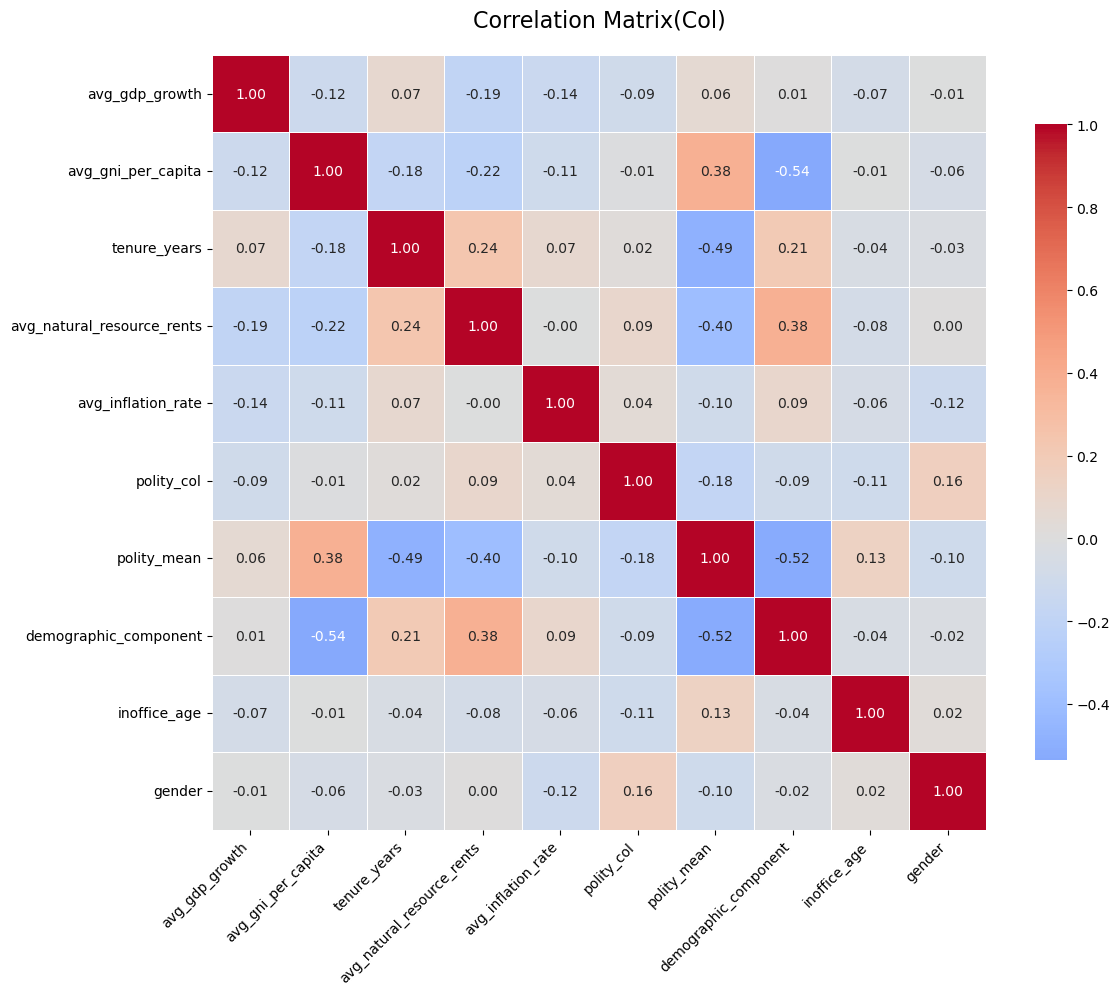

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 选择你要绘制热力图的变量
variables = ['avg_gdp_growth', 'avg_gni_per_capita', 'tenure_years', 
            'avg_natural_resource_rents', 'avg_inflation_rate', 
            'polity_col', 'polity_mean', 'demographic_component',
            'inoffice_age', 'gender']

# 计算相关系数矩阵
corr_matrix = df_col[variables].corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True,         # 显示数值
           fmt='.2f',          # 数值格式
           cmap='coolwarm',    # 颜色映射
           center=0,           # 中心点为0
           square=True,        # 单元格为正方形
           linewidths=0.5,     # 单元格边框宽度
           cbar_kws={"shrink": 0.8})  # 颜色条大小

plt.title('Correlation Matrix(Col)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # x轴标签旋转
plt.tight_layout()
plt.savefig(r'C:\Users\Lenovo\Desktop\figures\correlation_matrix_col.png', dpi=300, bbox_inches='tight')
plt.show()

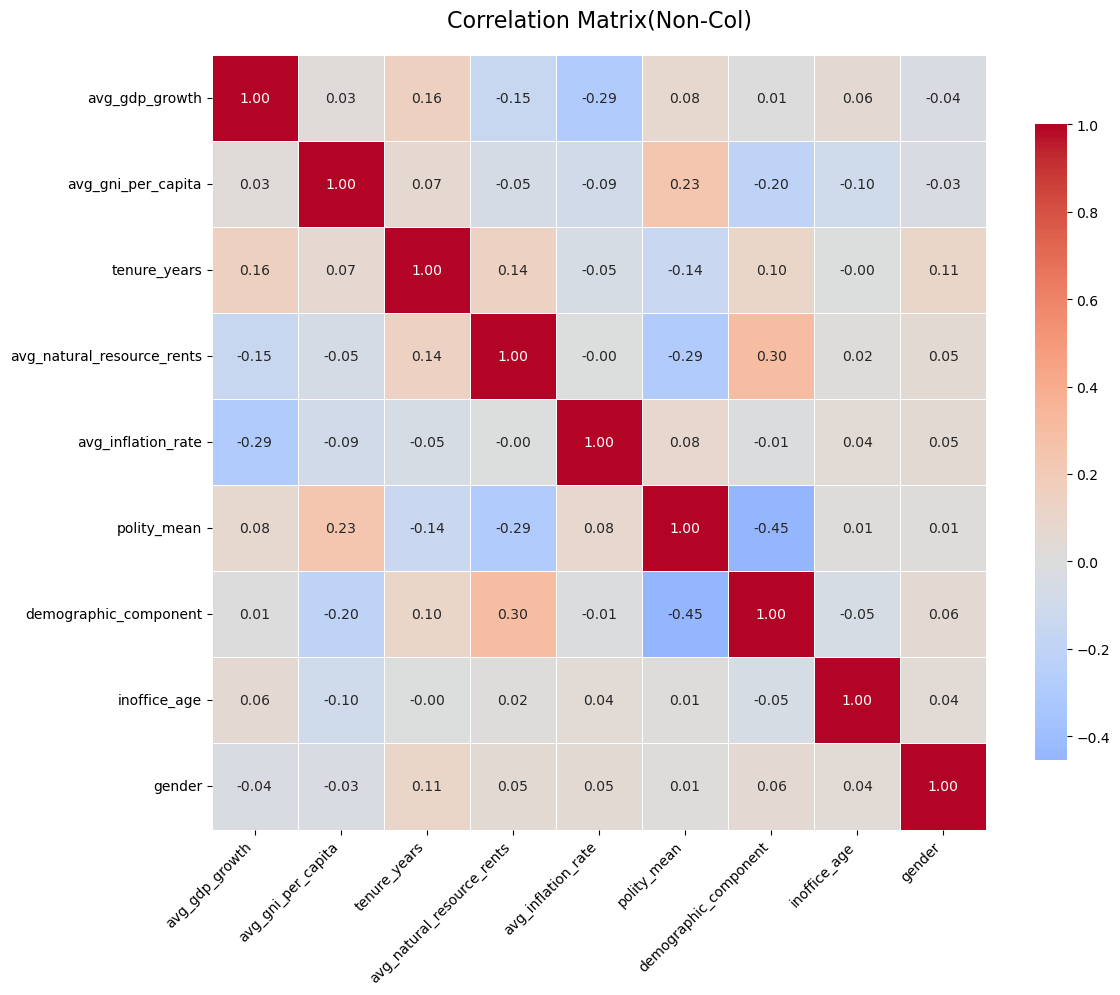

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 选择你要绘制热力图的变量
variables = ['avg_gdp_growth', 'avg_gni_per_capita', 'tenure_years', 
            'avg_natural_resource_rents', 'avg_inflation_rate', 
             'polity_mean', 'demographic_component',
            'inoffice_age', 'gender']

# 计算相关系数矩阵
corr_matrix = df_noncol[variables].corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True,         # 显示数值
           fmt='.2f',          # 数值格式
           cmap='coolwarm',    # 颜色映射
           center=0,           # 中心点为0
           square=True,        # 单元格为正方形
           linewidths=0.5,     # 单元格边框宽度
           cbar_kws={"shrink": 0.8})  # 颜色条大小

plt.title('Correlation Matrix(Non-Col)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # x轴标签旋转
plt.tight_layout()
plt.savefig(r'C:\Users\Lenovo\Desktop\figures\correlation_matrix_non_col.png', dpi=300, bbox_inches='tight')
plt.show()

In [73]:
# Heterogeneity Analysis using OLS 
# for COLONIZED COUNTRIES
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

col_gdp_ten = 'avg_gdp_growth ~ tenure_years + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_col + polity_mean + inoffice_age + gender'

model_col_gdp_ten = smf.ols(formula=col_gdp_ten, data=df_col).fit()


print("\n" + "="*60)
print("OLS回归结果")
print("="*60)
print(model_col_gdp_ten.summary())

col_gni_ten = 'avg_gni_per_capita ~ tenure_years + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_col + polity_mean + inoffice_age + gender'
model_col_gni_ten = smf.ols(formula=col_gni_ten, data=df_col).fit()


OLS回归结果
                            OLS Regression Results                            
Dep. Variable:         avg_gdp_growth   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.660
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           0.000451
Time:                        20:54:22   Log-Likelihood:                -739.35
No. Observations:                 285   AIC:                             1497.
Df Residuals:                     276   BIC:                             1530.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept  

In [72]:
def create_simple_table(model):
    results = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values,
        'P>|t|': model.pvalues.values
    })
    
    def add_stars(row):
        coef = f"{row['Coefficient']:.3f}"
        if row['P>|t|'] < 0.001: return f"{coef}***"
        if row['P>|t|'] < 0.01: return f"{coef}**"
        if row['P>|t|'] < 0.05: return f"{coef}*"
        if row['P>|t|'] < 0.1: return f"{coef}+"
        return coef
    
    results['Coefficient'] = results.apply(add_stars, axis=1)
    
    print("="*50)
    print("Regression Results")
    print("="*50)
    print(f"{'Variable':<25} {'Coefficient':<15}")
    print("-"*45)
    
    for _, row in results.iterrows():
        var_name = row['Variable'].replace('I(polity_mean**2)', 'polity_mean²')
        print(f"{var_name:<25} {row['Coefficient']:<15}")
    
    print("-"*45)
    print(f"{'N':<25} {model.nobs:<15.0f}")
    print(f"{'R-squared':<25} {model.rsquared:<15.3f}")
    print(f"{'Adj. R-squared':<25} {model.rsquared_adj:<15.3f}")
    print("\n*** p<0.001, ** p<0.01, * p<0.05, + p<0.1")

# 生成表格
create_simple_table(model_col_gdp_ten)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 3.657*         
tenure_years              0.100*         
avg_natural_resource_rents -0.101***      
avg_inflation_rate        -0.004**       
demographic_component     0.407+         
polity_col                -0.035         
polity_mean               0.066          
inoffice_age              -0.034+        
gender                    0.071          
---------------------------------------------
N                         285            
R-squared                 0.096          
Adj. R-squared            0.070          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1


In [74]:
create_simple_table(model_col_gni_ten)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 17073.461**    
tenure_years              -95.736        
avg_natural_resource_rents 17.028         
avg_inflation_rate        -6.182         
demographic_component     -7227.273***   
polity_col                -99.721        
polity_mean               303.023        
inoffice_age              -69.377        
gender                    -4339.190      
---------------------------------------------
N                         285            
R-squared                 0.310          
Adj. R-squared            0.290          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1


In [76]:
#for NON-COLONIZED COUNTRIES
noncol_gdp_ten = 'avg_gdp_growth ~ tenure_years + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_mean + inoffice_age + gender'
model_noncol_gdp_ten = smf.ols(formula=noncol_gdp_ten, data=df_noncol).fit()
noncol_gni_ten = 'avg_gni_per_capita ~ tenure_years + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_mean + inoffice_age + gender'
model_noncol_gni_ten = smf.ols(formula=noncol_gni_ten, data=df_noncol).fit()

In [77]:
create_simple_table(model_noncol_gdp_ten)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 -0.184         
tenure_years              0.134**        
avg_natural_resource_rents -0.095**       
avg_inflation_rate        -0.004***      
demographic_component     0.373          
polity_mean               0.087*         
inoffice_age              0.035          
gender                    -0.927         
---------------------------------------------
N                         312            
R-squared                 0.151          
Adj. R-squared            0.132          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1


In [78]:
create_simple_table(model_noncol_gni_ten)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 10987.566**    
tenure_years              204.855*       
avg_natural_resource_rents 52.007         
avg_inflation_rate        -3.003+        
demographic_component     -1168.469*     
polity_mean               355.432***     
inoffice_age              -108.859+      
gender                    -1437.434      
---------------------------------------------
N                         312            
R-squared                 0.101          
Adj. R-squared            0.081          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1


In [79]:
# Impact of Colony Duration
col_gdp_col = 'avg_gdp_growth ~ colonial_duration + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_col + polity_mean + inoffice_age + gender'
model_col_gdp_col = smf.ols(formula=col_gdp_col, data=df_col).fit()
col_gni_col = 'avg_gni_per_capita ~ colonial_duration + avg_natural_resource_rents + avg_inflation_rate + demographic_component + polity_col + polity_mean + inoffice_age + gender'
model_col_gni_col = smf.ols(formula=col_gni_col, data=df_col).fit()

In [81]:
create_simple_table(model_col_gdp_col)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 4.389**        
colonial_duration         0.005          
avg_natural_resource_rents -0.097***      
avg_inflation_rate        -0.004*        
demographic_component     0.301          
polity_col                -0.048         
polity_mean               0.002          
inoffice_age              -0.032+        
gender                    -0.048         
---------------------------------------------
N                         285            
R-squared                 0.078          
Adj. R-squared            0.051          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1


In [82]:
create_simple_table(model_col_gni_col)

Regression Results
Variable                  Coefficient    
---------------------------------------------
Intercept                 17622.623**    
colonial_duration         -37.933        
avg_natural_resource_rents 21.821         
avg_inflation_rate        -5.254         
demographic_component     -6820.833***   
polity_col                -61.977        
polity_mean               417.537*       
inoffice_age              -72.110        
gender                    -4558.069      
---------------------------------------------
N                         285            
R-squared                 0.313          
Adj. R-squared            0.293          

*** p<0.001, ** p<0.01, * p<0.05, + p<0.1
